|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [51]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix ,accuracy_score

import warnings
warnings.filterwarnings("ignore")



# Q2: Read instagram_users.csv file

In [52]:
df=pd.read_csv('instagram_users.csv')
df.head()

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,fake


In [53]:
features_col=[' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval']

In [54]:
x=df[features_col] # featuers
y=df.real_fake # target

# Q3: Split tha dataset into training and testing

In [55]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [56]:
# build the Decision Tree model

dtree= DecisionTreeClassifier()

dtree.fit(x_train,y_train)

y_pred = dtree.predict(x_test)

matrix =metrics.confusion_matrix(y_test,y_pred)

#print the result
print('the model name :', dtree ,end='\n' )
print('the model accuracy : ', metrics.accuracy_score(y_test, y_pred) )
print('the model confusion matrix. : ', matrix)



the model name : DecisionTreeClassifier()
the model accuracy :  0.8514060392238249
the model confusion matrix. :  [[8136 1413]
 [1451 8274]]


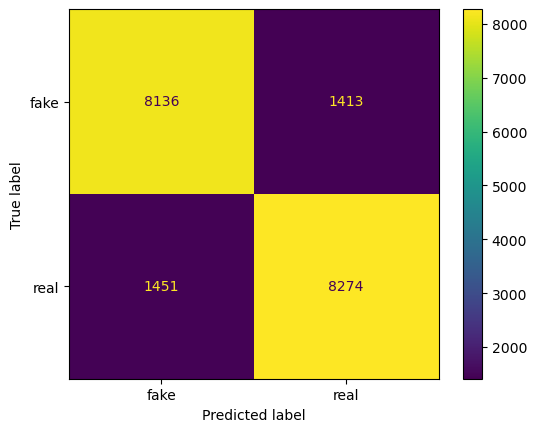

In [57]:

plot_confusion_matrix(dtree, x_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [58]:
# build   Random Forest model
#  The number of trees in the forest defult 100
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print('the model name :', rfc ,end='\n' )
print('the model accuracy : ' ,metrics.accuracy_score(y_test, rfc_pred) )
print('the model confusion matrix. : ',metrics.confusion_matrix(y_test,rfc_pred))




the model name : RandomForestClassifier()
the model accuracy :  0.8956106672200892
the model confusion matrix. :  [[7961 1588]
 [ 424 9301]]


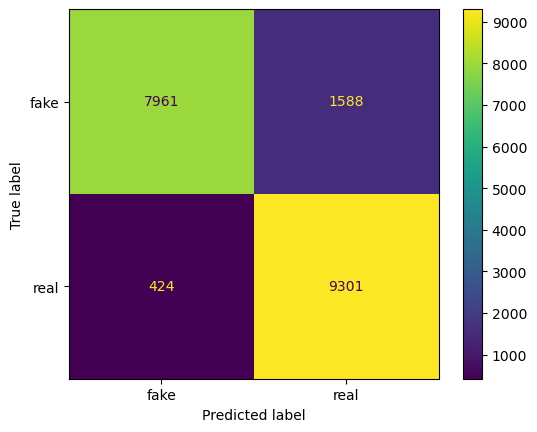

In [59]:
plot_confusion_matrix(rfc, x_test, y_test)  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

# linear regression

In [60]:
df_copy=df.copy()
fr=df_copy.iloc[:,17]
array=np.asarray(fr).reshape(-1,1)
array

array([['fake'],
       ['fake'],
       ['fake'],
       ...,
       ['real'],
       ['real'],
       ['real']], dtype=object)

In [61]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_copy['col_cd']=encoder.fit_transform(array)


In [62]:
df_copy.drop('real_fake',axis='columns',inplace=True)
df_copy

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,col_cd
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,0.0
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,0.0
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,0.0
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,0.0
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64239,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,1.0
64240,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,1.0
64241,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,1.0
64242,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,1.0


In [63]:
X=df_copy.drop('col_cd',1)
Y=df_copy['col_cd']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [76]:

from sklearn import linear_model 
from sklearn.utils import shuffle


# DEFIND THE MODEL
linear = linear_model.LinearRegression()
linear.fit(X_train, Y_train)
Y_pred=linear.predict(X_test)

new_df= pd.DataFrame(linear.coef_,X.columns,columns=['Coefficient'])



print('the name of the model :' ,linear, end='\n')
print('the model  accuracy :' , linear.score(X_test, Y_test) )
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('the Coefficient :',display(new_df) )


 

the name of the model : LinearRegression()
the model  accuracy : 0.38331984831794585
MAE: 0.33030009691249823
MSE: 0.15413318356693842
RMSE: 0.3925979923113953


,Coefficient
Num_posts,-4.517233e-06
Num_following,3.176692e-07
Num_followers,-6.494131e-05
Biography_length,7.320738e-04
Picture_availability,4.585159e-02
Link_availability,3.230799e-01
Average_caption_length,-1.760559e-04
Caption_zero,-3.972154e-02
Non_image_percentage,4.253580e-02
Engagement_rate_like,-1.798832e-05


the Coefficient : None


# logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression
# create instance
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_p=logmodel.predict(x_test)


print('the name of the model :' , logmodel , end='\n')
print( metrics.accuracy_score(y_test,y_p))
print('the model confusion matrix. : ', metrics.confusion_matrix(y_test,y_p))




the name of the model : LogisticRegression()
0.7572896129500882
the model confusion matrix. :  [[6657 2892]
 [1786 7939]]


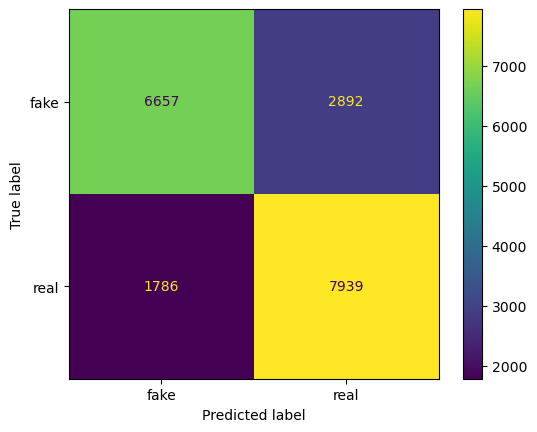

In [74]:
plot_confusion_matrix(logmodel, x_test, y_test)  
plt.show()